In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
df=pd.read_csv('D:\CRM Analytics\DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
data_delivery_status = df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders'],color=data_delivery_status['Number of Orders'],labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

# Around 100K orders are delivered late 

In [7]:
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders',color='Order Region')

## Central America and Western Europe have highest nukber of orders which are received late.

In [8]:
## Top 20 customers with most number of orders.
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders')

C:\Users\adity\AppData\Local\Temp\ipykernel_6676\525104728.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
# Top 20 most profitable customers.
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers_profit=df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

px.bar(data_customers_profit.head(20),x='Profit of Orders', y='Customer_ID_STR',color='Profit of Orders')

C:\Users\adity\AppData\Local\Temp\ipykernel_6676\4110423189.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
# Performing Customer Segmentation
data_Customer_Segment=df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

In [11]:
## Finding all the product categrories and number of orders for each category
data_Category_Name=df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)

px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')

In [12]:
## Finding Profit on each order Country wise
df_geo=df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo

,Order Country,Order City,Profit of Orders
3260,República Dominicana,Santo Domingo,51111.670019
1492,Estados Unidos,New York City,47889.759868
2152,Honduras,Tegucigalpa,40973.640056
1430,Estados Unidos,Los Angeles,38014.360024
2837,Nicaragua,Managua,34319.950107
...,...,...,...
738,China,Dalian,-1588.609972
3,Afganistán,Kandahar,-1681.830001
3110,Reino Unido,Dudley,-1742.079996
2463,Italia,Cerignola,-2212.530012


In [13]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [14]:
## Product Analysis
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')

In [15]:
#Category Name
df_sales_pr=df1.groupby([  'Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)

px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Category Name',color ='Sales of Orders')

In [16]:
# Different Types of Payment methods available and number of sales orders recorded with them 
df_sales_pr=df1.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)

px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')

In [17]:
data=df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [19]:
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

In [20]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
0,1,18934,2568,0,0,40,66,1,20649,0,...,114,47,0,78,78,62,0,27149,3,11912
1,3,2272,2559,1,1,40,66,1,19386,0,...,114,47,0,78,78,62,0,2209,3,10509
2,0,2293,2555,3,0,40,452,0,19385,0,...,114,47,0,78,78,62,0,1980,3,10508
3,1,13638,2546,0,0,40,285,0,19384,2,...,114,47,0,78,78,62,0,1752,3,10507
4,2,20599,2526,0,0,40,66,1,19383,1,...,114,47,0,78,78,62,0,1528,3,10505


In [21]:
data1=pd.concat([features,target],axis=1)

In [22]:
corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode',
       'Product Description', 'Product Image', 'Product Status',
       'Shipping Mode', 'Customer_ID_STR', 'SUSPECTED_FRAUD'],
      dtype='object')

In [23]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]

In [24]:
from scipy.stats import pearsonr

corre=pd.DataFrame()
for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])    
corre

C:\Users\adity\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

C:\Users\adity\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode,Customer_ID_STR
0,0.202094,-0.002586,-0.000807,0.128768,-0.167158,-0.002104,-0.003561,0.006756,0.009375,-0.005935,...,0.000315,-0.000757,0.009077,-0.006105,0.004666,NaN,-0.000741,NaN,-0.004641,0.000490
1,0.000000,0.271923,0.731807,0.000000,0.000000,0.371352,0.130283,0.004098,0.000068,0.011686,...,0.893383,0.747677,0.000115,0.009491,0.047437,NaN,0.752963,NaN,0.048639,0.835012


In [25]:
corre1=corre.T

coore2= corre1.iloc[:,0].sort_values(ascending=False)
coore2

Type                        0.202094
Delivery Status             0.128768
Customer Id                 0.009375
Order Region                0.009077
Customer Country            0.006756
Customer State              0.005670
Longitude                   0.005100
Order Zipcode               0.004666
order date (DateOrders)     0.003002
Order Item Discount         0.002893
Order Item Discount Rate    0.002271
Order Id                    0.002222
Customer_ID_STR             0.000490
Order Item Product Price    0.000315
Market                     -0.000293
Product Image              -0.000741
Order Item Quantity        -0.000757
Sales per customer         -0.000807
Department Name            -0.000837
Order Item Cardprod Id     -0.001109
Category Name              -0.002104
Benefit per order          -0.002586
Customer City              -0.003561
Shipping Mode              -0.004641
Latitude                   -0.004709
Order Country              -0.004928
Customer Zipcode           -0.005600
O

In [26]:
# Dropping all those feartures which are having less than +-0.004 Correlation with target variable.

new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

In [27]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [28]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [29]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
18,Order Customer Id,15.868141,0.000
3,Delivery Status,3043.655705,0.000
4,Late_delivery_risk,5188.953532,0.000
31,Order Region,14.875551,0.000
8,Customer Id,15.868141,0.000
7,Customer Country,8.239934,0.004
32,Order State,6.728124,0.009
16,Order City,6.260967,0.012
9,Customer Segment,6.358072,0.012


In [30]:
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]

In [31]:
final_data=pd.concat([final_features, target], axis=1)

In [32]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

In [35]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])

In [36]:
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

In [37]:
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [38]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.9764456985828234
RandomForestClassifier :  0.9914468718594703
KNeighborsClassifier :  0.9817637011135805
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.9930699634758415


In [39]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },]

In [40]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [41]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [42]:
best_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'log2',
 'classifier__criterion': 'entropy',
 'classifier': RandomForestClassifier(criterion='entropy', max_features='log2')}

In [43]:
pipeline_rf = Pipeline([('scaler', StandardScaler()), 
                           ('Random Forest Calssifer', RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        n_estimators=150))])

In [44]:
model = pipeline_rf.fit(X_train, y_train)

In [45]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

,actual,predicted
116587,0,0
36340,0,0
175763,0,0
96918,0,0
71197,0,0


In [46]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.head()

,actual,predicted
80120,0,0
19670,0,0
114887,0,0
120110,0,0
56658,0,0


In [47]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  0.9964269886993131


In [48]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  1.0
ROC-AUC Score for validation dataset :  0.956264587414361


<AxesSubplot: >

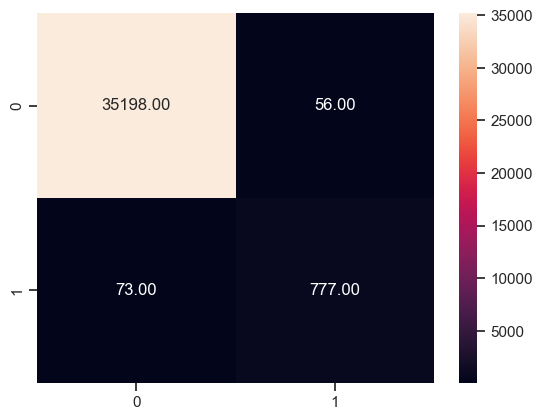

In [49]:
conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [50]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.93      0.91      0.92       850

    accuracy                           1.00     36104
   macro avg       0.97      0.96      0.96     36104
weighted avg       1.00      1.00      1.00     36104



In [51]:
# ABC ANALYSIS        

In [52]:
dF_clean=df[df["Delivery Status"]!="Shipping canceled"].copy()

In [53]:
Total_Products=dF_clean["Product Name"].nunique()
print("Total Number of products: "+f"{Total_Products}")

Total Number of products: 118


In [54]:
Revenue_ABC=dF_clean.groupby(["Department Name","Product Name"]).agg(Total_Revenue=("Order Item Total","sum")).sort_values(by="Total_Revenue",ascending=False).reset_index()
Revenue_ABC["cum_sum"]=Revenue_ABC["Total_Revenue"].cumsum()
Revenue_ABC["cum_per"]=Revenue_ABC["cum_sum"]/Revenue_ABC["Total_Revenue"].sum()*100
Revenue_ABC["per"]=Revenue_ABC["cum_per"]-Revenue_ABC["cum_per"].shift(1)
Revenue_ABC.loc[0,"per"]=Revenue_ABC["cum_per"][0]

In [55]:
def ABC(data):
    if data["cum_per"]<=75:
        return "A"
    elif data["cum_per"]>75 and data["cum_per"]<=95:
        return "B"
    elif data["cum_per"]>95:
        return "C"

Revenue_ABC["ABC_Revenue"]=Revenue_ABC.apply(ABC,axis=1)

In [56]:
Bar_graph_Abc=Revenue_ABC[["ABC_Revenue","Product Name","Total_Revenue"]].groupby("ABC_Revenue").agg(Revenue=("Total_Revenue","sum"),count=("Product Name","count"))

In [57]:
Bar_graph_Abc
fig2=go.Figure(go.Bar(x=Bar_graph_Abc.index,
                      y=Bar_graph_Abc["Revenue"],
                     hovertemplate ="%{label}<br>Revenue:%{value}",
                     texttemplate = "Revenue<br>%{value}",
                     marker_color=["orange","lightgreen","red"],
                     showlegend=False))
fig2.add_trace(                          
    go.Scatter(                          
    x=Bar_graph_Abc.index,
    y=Bar_graph_Abc["count"],
    name="Number Of Products",
    mode='lines',                                                       
    line = dict(color='blue', width=3),   
    yaxis="y2",
    marker_line_width = 0
    ))

fig2.update_layout(
                   title="Revenue Generated By Products in Different ABC Segments",
                   xaxis=dict(title="Segment" ),
                   yaxis=dict(title="Revenue",showgrid=False),
                   yaxis2=dict(title="Number Of Products", anchor="x", overlaying="y",side="right",dtick=10),
                   legend = dict(x = 1.05, y = 1))
fig2.show()

In [58]:
Top6Cities=dF_clean[["Order City","Order Item Total"]].groupby("Order City").sum().sort_values(by="Order Item Total",ascending=False).head(6)

In [59]:
def wrap(a):
    str1=a.split(" ")
    final_str=""
    for c in str1:
        final_str=final_str+c+'<br>'
    return final_str

In [60]:
data=dF_clean[dF_clean["Order City"].isin(Top6Cities.index.tolist())].groupby(["Order City","Product Name"],as_index=False).agg(Total_Revenue=("Order Item Total","sum")).sort_values(by=["Order City","Total_Revenue"],ascending=False)
data["sum"]=data.groupby("Order City")["Total_Revenue"].transform('sum')
data["cum_per"]=data.groupby("Order City")["Total_Revenue"].cumsum()/data["sum"]*100
data["segment"]=data.apply(ABC,axis=1)
data["Product Name"]=data["Product Name"].apply(wrap)
data.sort_values(by=["sum","Total_Revenue"],inplace=True,ascending=False)

In [61]:
fig = px.bar(data[data["segment"]=="A"], x='Product Name', y='Total_Revenue',
             facet_col='Order City',facet_col_wrap=2,facet_row_spacing=0.12,
             height=1500,title="A Segment Products in Top 6 Cities")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showticklabels=True,tickangle=0)
fig.update_layout(width=950)
fig.show()

In [62]:
df['Product Price']

0         327.750000
1         327.750000
2         327.750000
3         327.750000
4         327.750000
             ...    
180514    399.980011
180515    399.980011
180516    399.980011
180517    399.980011
180518    399.980011
Name: Product Price, Length: 180519, dtype: float64

In [63]:
df_EOQ = df[['Product Price', 'Order Item Quantity']]

In [64]:
df_EOQ.head()

,Product Price,Order Item Quantity
0,327.75,1
1,327.75,1
2,327.75,1
3,327.75,1
4,327.75,1


In [65]:
holdingcost = 0.2
def calculate_eoq(data):
    S = data['Product Price']
    D = data['Order Item Quantity'] 
    H = data['Order Item Quantity'] * holdingcost
    EOQ = np.sqrt((2*S*D)/H)
    return round(EOQ)

In [66]:
df_EOQ['EOQ_Value'] = calculate_eoq(df_EOQ)

C:\Users\adity\AppData\Local\Temp\ipykernel_6676\2320327140.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df_EOQ.head()

,Product Price,Order Item Quantity,EOQ_Value
0,327.75,1,57.0
1,327.75,1,57.0
2,327.75,1,57.0
3,327.75,1,57.0
4,327.75,1,57.0


In [69]:
data=df[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 
             'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode', 
             'Department Name', 'Market', 'Order City', 'Order Country', 'Customer Id',
             'order date (DateOrders)', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate',
             'Order Item Id', 'Order Item Profit Ratio', 'Sales', 'Order Status',
             'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Zipcode', 
             'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
             'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]

In [70]:
features=data.drop(columns=['Late_delivery_risk'])
target=data['Late_delivery_risk']

In [71]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,0,40,66,1,0,36,7,...,609,114,47,0,78,78,62,0,27149,3
1,3,2272,2559,1,40,66,1,0,36,7,...,609,114,47,0,78,78,62,0,2209,3
2,0,2293,2555,3,40,452,0,0,5,941,...,609,114,47,0,78,78,62,0,1980,3
3,1,13638,2546,0,40,285,0,2,5,720,...,609,114,47,0,78,78,62,0,1752,3
4,2,20599,2526,0,40,66,1,1,36,7,...,609,114,47,0,78,78,62,0,1528,3


In [72]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [73]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [74]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,685.999651,0.000
3,Delivery Status,6798.252477,0.000
36,Shipping Mode,34666.398337,0.000
25,Order Region,6.848744,0.009
5,Customer City,4.662629,0.031
35,shipping date (DateOrders),3.556568,0.059


In [75]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Delivery Status', 'Shipping Mode', 'Order Region',
       'Customer City', 'shipping date (DateOrders)'], dtype=object)

In [76]:
df['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

<AxesSubplot: >

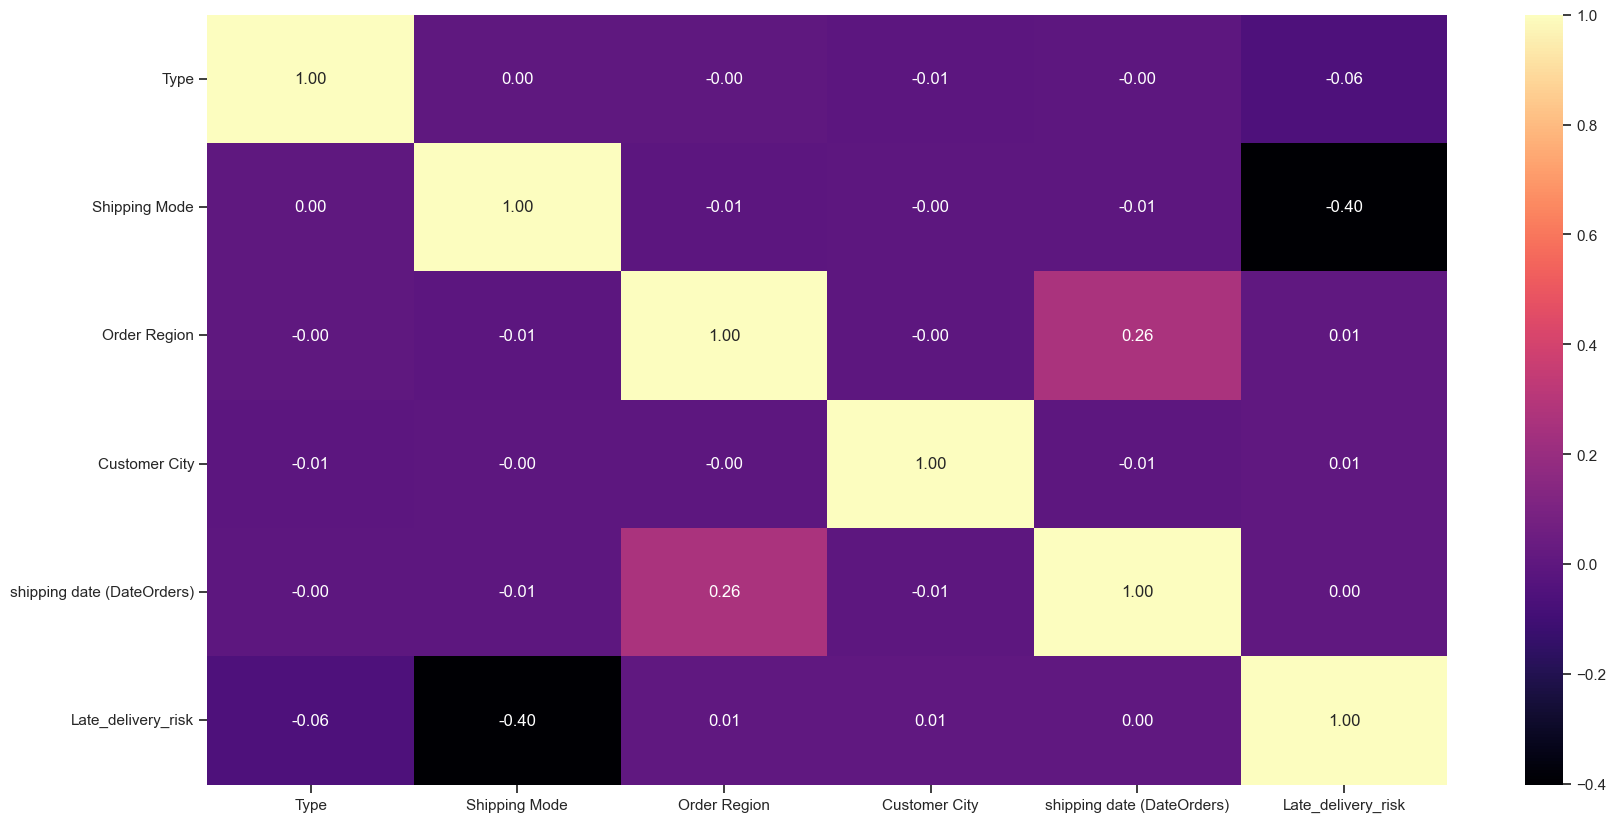

In [77]:
final_features=features[['Type', 'Shipping Mode', 'Order Region','Customer City', 'shipping date (DateOrders)']]

final_data=pd.concat([final_features, target], axis=1)

fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state = 42)

In [79]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.6906918386309326
RandomForestClassifier :  0.8930026980084481
KNeighborsClassifier :  0.7422761862169995
GaussianNB :  0.6718960851534189
SGDClassifier :  0.6906918386309326
DecisionTreeClassifier :  0.8860837273931115


In [80]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    {"classifier": [KNeighborsClassifier()],
     "classifier__n_neighbors": [2,3,4,5,6],
     "classifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
     "classifier__leaf_size": [10,20,30,40,50],
    
    },
    
    {"classifier": [DecisionTreeClassifier()],
    "classifier__splitter" :["best", "random"],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
]

In [81]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [82]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


C:\Users\adity\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [83]:
best_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'auto',
 'classifier__criterion': 'entropy',
 'classifier': RandomForestClassifier(criterion='entropy', max_features='auto')}

In [84]:
pipeline_rfl = Pipeline([('scaler', StandardScaler()), 
                           ('RandomForestClassifier', RandomForestClassifier(criterion='entropy'))])

In [85]:
model_rfl = pipeline_rfl.fit(X_train, y_train)

In [86]:
rfl_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model_rfl.predict(X_train)})
rfl_train_predict.head()

,actual,predicted
116587,1,1
36340,0,0
175763,1,1
96918,1,1
71197,1,1


In [87]:
rfl_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

,actual,predicted
80120,1,1
19670,1,1
114887,0,1
120110,1,1
56658,0,0


In [88]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))

Accuracy Score for train dataset :  0.9999930755115466
Accuracy Score for test dataset :  0.9479005096388212


In [89]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rfl_test_predict.actual, rfl_test_predict.predicted))

ROC-AUC Score for train dataset :  0.9999936852740592
ROC-AUC Score for validation dataset :  0.9475955756224012


<AxesSubplot: >

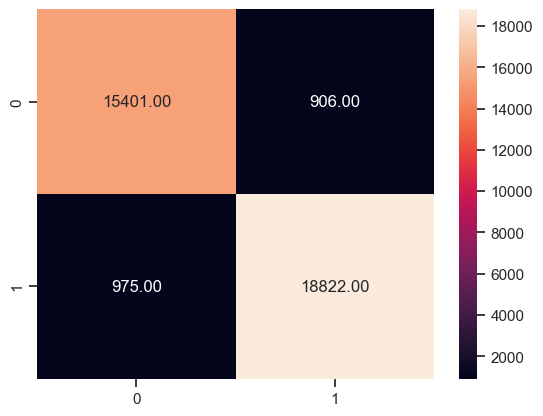

In [91]:
conn_cm_test = metrics.confusion_matrix(rfl_test_predict.actual, rfl_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [92]:
print(metrics.classification_report(rfl_test_predict.actual, rfl_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16307
           1       0.95      0.95      0.95     19797

    accuracy                           0.95     36104
   macro avg       0.95      0.95      0.95     36104
weighted avg       0.95      0.95      0.95     36104

